In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/ML-Olympiad/Detect-ChatGpt-answers/"

train = pd.read_csv(PATH+'data/train.csv')
test = pd.read_csv(PATH+'data/test.csv')
submission = pd.read_csv(PATH+'data/sample_submission.csv')

Mounted at /content/drive


## 1. 전처리

In [3]:
train["text"]=train["prompt"]+train["answer"]
train=train[["text","AI"]]

In [4]:
test["text"]=test["prompt"]+test["answer"]
test=test["text"]

In [5]:
train["text"].isna().sum()

1

In [6]:
train = train[train["text"].isna()==False]

In [7]:
train["AI"].isna().sum()

1

In [8]:
train = train[train["AI"].isna()==False]

In [9]:
test.isna().sum()

0

In [10]:
train

,text,AI
0,What is the future of AI?The future of Artific...,1.0
1,What is your biggest challenge in your career?...,0.0
2,What is the tallest mountain in the world?The ...,1.0
3,What are the best 5 super cars?McLaren 720S.\r...,0.0
4,What is deep learning?a type of machine learni...,0.0
...,...,...
743,What is the most important thing in a family?T...,0.0
744,What are the best machine learning Models?Line...,0.0
745,How can I chop onions without crying?The best ...,0.0
746,What is the best way to stay healthy?The best ...,0.0


In [11]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=fb8a7df0abc4ee57c54b0b23c54bec0492cca119c1349aede2f6b346cc74931a
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [12]:
import numpy as np

In [13]:
import re
def removeHTML(x):
    html=re.compile(r'<.*?>')
    return html.sub(r'',x)
    
import emoji
def dataPreprocessing(x): 
    x = x.lower()
    x = removeHTML(x)
    x = emoji.demojize(x, delimiters=(" ", " "))
    x = re.sub("@\w+", '',x) # removing mentions (@)
    x = re.sub("'\d+", '',x)
    x = re.sub("\d+", '',x)
    x = re.sub(r"[^\w\s]", '',x) # to remove symbols
    x = re.sub("http\w+", '',x)
    x = re.sub("\s[a-z]\s", '',x)
    x = x.strip()
    return x

In [14]:

train_text=train["text"].apply(lambda x: dataPreprocessing(x))

In [15]:
test_text=test.apply(lambda x: dataPreprocessing(x))

In [16]:
train_text

0      what is the future of aithe future of artifici...
1      what is your biggest challenge in your careerm...
2      what is the tallest mountain in the worldthe t...
3      what are the best  super carsmclaren\nferrari ...
4      what is deep learninga type of machine learnin...
                             ...                        
743    what is the most important thing infamilythe m...
744    what are the best machine learning modelslinea...
745    how canchop onions without cryingthe best thin...
746    what is the best way to stay healthythe best w...
747    do you think naruto is overratedi think naruto...
Name: text, Length: 746, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

X = train_text
y = train['AI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
pd.DataFrame(X_train, columns=['text'])

,text
70,what is the name of the unit used to measure p...
164,what is the name of the largest underwater cav...
712,what is the name of the gas that makes up the ...
265,what is the name of the largest underwater cav...
250,what is the most important factor in makingdec...
...,...
71,what is your biggest strengthmy biggest streng...
106,what is the currency of australiaaustralian do...
270,what is the best way to stay positivethe best ...
435,what is the name of the largest underwater cav...


In [19]:
pd.DataFrame(y_train, columns=['AI'])

,AI
70,1.0
164,0.0
712,0.0
265,0.0
250,0.0
...,...
71,0.0
106,0.0
270,0.0
435,0.0


In [ ]:
# train_data = pd.concat([pd.DataFrame(X_train, columns=['text']), pd.DataFrame(y_train, columns=['AI'])], axis=1)
# train_data

In [ ]:
# test_data = pd.concat([pd.DataFrame(X_test, columns=['text']), pd.DataFrame(y_test, columns=['AI'])], axis=1)
# test_data

In [20]:
import matplotlib.pyplot as plt

텍스트의 최소 길이 : 6
텍스트의 최대 길이 : 303
텍스트의 평균 길이 : 33.89261744966443


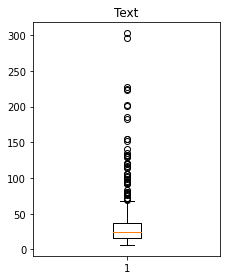

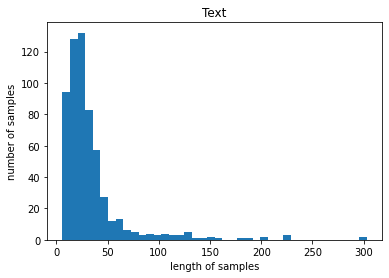

In [21]:
# 길이 분포 출력
text_len = [len(s.split()) for s in X_train]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))


plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 2. 모델링

In [22]:
import os

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_files

import autokeras as ak

In [23]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=6, objective='val_accuracy', seed=32
)  

In [24]:
# 모델 저장 경로
model_dir = PATH+"model/autokeras_trial6_230305/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# 체크포인트 파일 저장 경로
checkpoint_path = model_dir+"checkpoints_model_autokeras_230305.ckpt"

In [25]:
callbacks = [
tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_weights_only=True, 
    monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
), 
tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=8, min_lr=0.0001
),
tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', patience=10, verbose=1), # val_acc로 설정했는데 모델마다 먹히는 경우가 다름 -> 버그로 추정?
]

In [26]:
# Feed the text classifier with training data.
clf.fit(X_train.values, y_train.values, callbacks=callbacks, validation_split=0.2, epochs=50)

Trial 6 Complete [00h 03m 47s]
val_accuracy: 0.9166666865348816

Best val_accuracy So Far: 0.9404761791229248
Total elapsed time: 00h 17m 55s
Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 0.5940 - accuracy: 0.6997

19/19 [==============================] - 57s 378ms/step - loss: 0.5940 - accuracy: 0.6997 - lr: 2.0000e-05
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.4271 - accuracy: 0.8221

19/19 [==============================] - 5s 281ms/step - loss: 0.4271 - accuracy: 0.8221 - lr: 2.0000e-05
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.8893

19/19 [==============================] - 5s 280ms/step - loss: 0.2920 - accuracy: 0.8893 - lr: 2.0000e-05
Epoch 4/50
19/19 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.9060

19/19 [==============================] - 5s 287ms/step - loss: 0.2282 - accuracy: 0.9060 - lr: 2.0000e-05
Epoch 5/50
19/19 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9480

19/19 [==============================] - 5s 283ms/step - loss: 0.1554 - accuracy: 0.9480 - lr: 2.0000e-05
Epoch 6/50
19/19 [==============================] - ETA: 0s - loss: 0.1123 - accuracy: 0.9597

19/19 [==============================] - 5s 283ms/step - loss: 0.1123 - accuracy: 0.9597 - lr: 2.0000e-05
Epoch 7/50
19/19 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9698

19/19 [==============================] - 5s 287ms/step - loss: 0.0786 - accuracy: 0.9698 - lr: 2.0000e-05
Epoch 8/50
19/19 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9664

19/19 [==============================] - 5s 285ms/step - loss: 0.0860 - accuracy: 0.9664 - lr: 2.0000e-05
Epoch 9/50
19/19 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9765

19/19 [==============================] - 5s 286ms/step - loss: 0.0577 - accuracy: 0.9765 - lr: 2.0000e-05
Epoch 10/50
19/19 [==============================] - ETA: 0s - loss: 0.0665 - accuracy: 0.9664

19/19 [==============================] - 5s 284ms/step - loss: 0.0665 - accuracy: 0.9664 - lr: 2.0000e-05
Epoch 11/50
19/19 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9799

19/19 [==============================] - 5s 282ms/step - loss: 0.0587 - accuracy: 0.9799 - lr: 2.0000e-05
Epoch 12/50
19/19 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9748

19/19 [==============================] - 5s 285ms/step - loss: 0.0563 - accuracy: 0.9748 - lr: 2.0000e-05
Epoch 13/50
19/19 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9815

19/19 [==============================] - 5s 283ms/step - loss: 0.0352 - accuracy: 0.9815 - lr: 2.0000e-05
Epoch 14/50
19/19 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9866

19/19 [==============================] - 5s 285ms/step - loss: 0.0227 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 15/50
19/19 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9782

19/19 [==============================] - 5s 284ms/step - loss: 0.0318 - accuracy: 0.9782 - lr: 2.0000e-05
Epoch 16/50
19/19 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9883

19/19 [==============================] - 5s 281ms/step - loss: 0.0285 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 17/50
19/19 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9866

19/19 [==============================] - 5s 284ms/step - loss: 0.0238 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 18/50
19/19 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9849

19/19 [==============================] - 5s 285ms/step - loss: 0.0252 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 19/50
19/19 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9815

19/19 [==============================] - 5s 287ms/step - loss: 0.0225 - accuracy: 0.9815 - lr: 2.0000e-05
Epoch 20/50
19/19 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9832

19/19 [==============================] - 5s 284ms/step - loss: 0.0227 - accuracy: 0.9832 - lr: 2.0000e-05
Epoch 21/50
19/19 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9849

19/19 [==============================] - 5s 286ms/step - loss: 0.0203 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 22/50
19/19 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9866

19/19 [==============================] - 5s 283ms/step - loss: 0.0201 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 23/50
19/19 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9799

19/19 [==============================] - 5s 286ms/step - loss: 0.0206 - accuracy: 0.9799 - lr: 2.0000e-05
Epoch 24/50
19/19 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9899

19/19 [==============================] - 5s 286ms/step - loss: 0.0176 - accuracy: 0.9899 - lr: 2.0000e-05
Epoch 25/50
19/19 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9815

19/19 [==============================] - 5s 285ms/step - loss: 0.0197 - accuracy: 0.9815 - lr: 2.0000e-05
Epoch 26/50
19/19 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9883

19/19 [==============================] - 5s 286ms/step - loss: 0.0173 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 27/50
19/19 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9832

19/19 [==============================] - 5s 283ms/step - loss: 0.0179 - accuracy: 0.9832 - lr: 2.0000e-05
Epoch 28/50
19/19 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9849

19/19 [==============================] - 5s 285ms/step - loss: 0.0160 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 29/50
19/19 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9883

19/19 [==============================] - 5s 280ms/step - loss: 0.0157 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 30/50
19/19 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9883

19/19 [==============================] - 5s 284ms/step - loss: 0.0156 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 31/50
19/19 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9832

19/19 [==============================] - 5s 286ms/step - loss: 0.0177 - accuracy: 0.9832 - lr: 2.0000e-05
Epoch 32/50
19/19 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9832

19/19 [==============================] - 5s 282ms/step - loss: 0.0174 - accuracy: 0.9832 - lr: 2.0000e-05
Epoch 33/50
19/19 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9883

19/19 [==============================] - 5s 285ms/step - loss: 0.0168 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 34/50
19/19 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9866

19/19 [==============================] - 5s 283ms/step - loss: 0.0153 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 35/50
19/19 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9899

19/19 [==============================] - 5s 286ms/step - loss: 0.0169 - accuracy: 0.9899 - lr: 2.0000e-05
Epoch 36/50
19/19 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9866

19/19 [==============================] - 5s 281ms/step - loss: 0.0169 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 37/50
19/19 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9883

19/19 [==============================] - 5s 283ms/step - loss: 0.0158 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 38/50
19/19 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9866

19/19 [==============================] - 5s 283ms/step - loss: 0.0161 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 39/50
19/19 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9883

19/19 [==============================] - 5s 282ms/step - loss: 0.0154 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 40/50
19/19 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9883

19/19 [==============================] - 5s 285ms/step - loss: 0.0141 - accuracy: 0.9883 - lr: 2.0000e-05
Epoch 41/50
19/19 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9849

19/19 [==============================] - 5s 283ms/step - loss: 0.0155 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 42/50
19/19 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9916

19/19 [==============================] - 5s 284ms/step - loss: 0.0140 - accuracy: 0.9916 - lr: 2.0000e-05
Epoch 43/50
19/19 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9866

19/19 [==============================] - 5s 284ms/step - loss: 0.0162 - accuracy: 0.9866 - lr: 2.0000e-05
Epoch 44/50
19/19 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9849

19/19 [==============================] - 5s 284ms/step - loss: 0.0156 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 45/50
19/19 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9849

19/19 [==============================] - 5s 283ms/step - loss: 0.0164 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 46/50
19/19 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9899

19/19 [==============================] - 5s 285ms/step - loss: 0.0150 - accuracy: 0.9899 - lr: 2.0000e-05
Epoch 47/50
19/19 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9849

19/19 [==============================] - 6s 287ms/step - loss: 0.0159 - accuracy: 0.9849 - lr: 2.0000e-05
Epoch 48/50
19/19 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9899

19/19 [==============================] - 5s 286ms/step - loss: 0.0148 - accuracy: 0.9899 - lr: 2.0000e-05
Epoch 49/50
19/19 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9899

19/19 [==============================] - 6s 288ms/step - loss: 0.0142 - accuracy: 0.9899 - lr: 2.0000e-05
Epoch 50/50
19/19 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9883

19/19 [==============================] - 5s 285ms/step - loss: 0.0149 - accuracy: 0.9883 - lr: 2.0000e-05


# 3. 성능 평가

In [27]:
model = clf.tuner.get_best_models(num_models=1)[0]

In [28]:
print(type(model))

<class 'keras.engine.functional.Functional'>


In [29]:
model.save(model_dir+"model_autokeras_trial6_1_230305.h5")

In [30]:
ak.CUSTOM_OBJECTS

{'BertPreprocessor': keras_nlp.models.bert.bert_preprocessor.BertPreprocessor,
 'BertBackbone': keras_nlp.models.bert.bert_backbone.BertBackbone,
 'CastToFloat32': autokeras.keras_layers.CastToFloat32,
 'ExpandLastDim': autokeras.keras_layers.ExpandLastDim,
 'MultiCategoryEncoding': autokeras.keras_layers.MultiCategoryEncoding}

In [31]:
# model_to_use = predictor.get_model_best()
model_pred = clf.predict(test_text.values)

8/8 [==============================] - 2s 200ms/step


In [32]:
submission['Category'] = model_pred

In [33]:
submission = submission.astype({'Category':'int64'})

In [34]:
submission

,Id,Category
0,710,1
1,487,0
2,136,1
3,44,1
4,627,0
...,...,...
244,702,1
245,500,0
246,818,0
247,584,0


In [35]:
submission.to_csv(PATH+'submit/autokeras_text_val_acc_trial6_submission_230305.csv', index=False)

In [36]:
export_model = clf.export_model()

try:
    export_model.save(model_dir+"model_autokeras_trial6_230305", save_format="tf")
except Exception:
    export_model.save(model_dir+"model_autokeras_trial6_230305.h5")

In [37]:
from sklearn.metrics import classification_report

In [45]:
# Predict with the best model.
predicted_y = clf.predict(X_test.values)
# Evaluate the best model with testing data.

5/5 [==============================] - 1s 218ms/step


In [46]:
print(classification_report(y_test.values, predicted_y))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       104
         1.0       0.80      0.89      0.85        46

    accuracy                           0.90       150
   macro avg       0.88      0.90      0.89       150
weighted avg       0.90      0.90      0.90       150

